In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BusData.csv')
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


In [2]:
df.shape

(2179, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


In [4]:
df = df.iloc[:800]

In [5]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

<AxesSubplot:xlabel='Arrival_delay', ylabel='Count'>

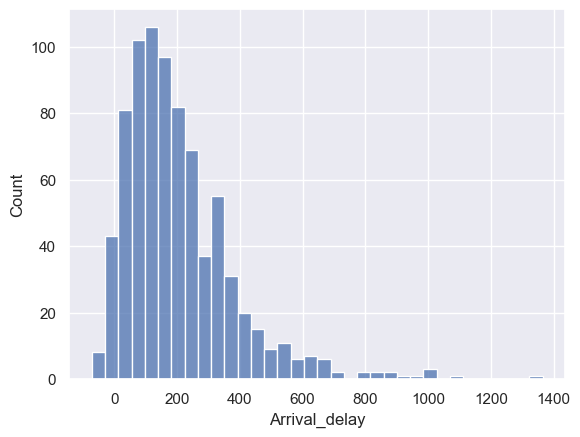

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'])

In [7]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

#sns.pairplot(x)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
base_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

param_grid = {
    'max_depth': [2, 3, 4],           
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [90, 100, 110],    
    'subsample': [0.7, 0.8,0.9],            
    'colsample_bytree': [0.9, 1.0]     
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=1
)
# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=2, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=2, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=2, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=2, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=2, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=2, n_estimators=90, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=2, n_estimators=90, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=2, n_estimators=90, subsample=0.8; total time=   0.0s
[CV] END colsampl

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=110, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=110, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=110, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=110, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estima

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=100, subs

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=110, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=110, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=110, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=110, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=110, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=110, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=110, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=90, s

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=2, n_estimators=100,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=90, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=90, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=90, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=90, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=90, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=90, subsampl

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=2, n_estimators=110, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=2, n_estimators=110, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=2, n_estimators=110, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=2, n_estimators=110, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=2, n_estimators=110, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=2, n_estimators=110, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=2, n_estimators=110, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=2, n_estimators=110, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=2, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimato

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=2, n_estimators=110, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=2, n_estimators=110, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=90, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=90, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=90, subsam

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=110, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=110, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=110, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=110,

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=90, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=90, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=90, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsam

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=110, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=110, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=110, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=110, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=110, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=110, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, n_estimators=110, subsample=0.9; total time=   0.0s
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Score: -457.4696425128097


In [19]:
final_model = grid_search.best_estimator_
print(final_model.get_params())

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1.0, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 3, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [20]:
y_pred = final_model.predict(X_test_scaled)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.732757981307804
Mean Squared Error: 206.12925425192088
R-squared: 0.9927746388045049


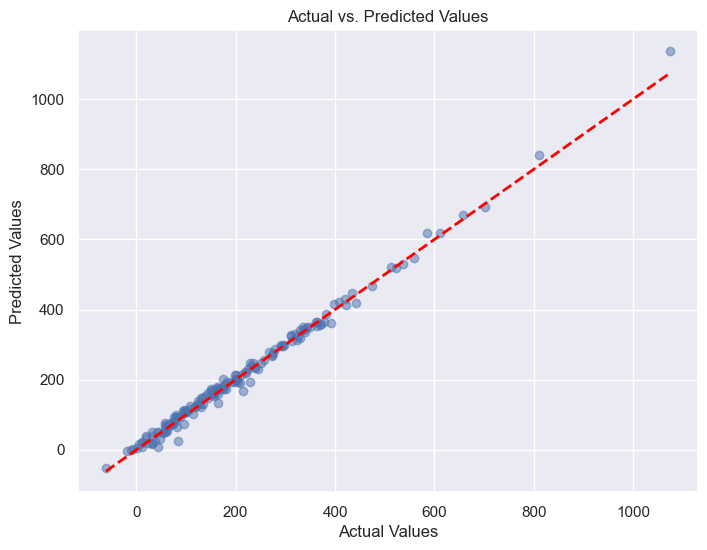

In [22]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()